In [1]:
import contextily as ctx
import geopandas as gpd
import os 
import pandas as pd

import matplotlib.pyplot as plt

from geopandas import GeoDataFrame
from shapely.geometry import  Point

In [2]:
AIRPORT = "ksea"
BASE_DIR = '../swim'
TRAJ_DIR = os.path.join(BASE_DIR, 'debug_data', f"{AIRPORT}_standalone")
MAP_DIR = os.path.join(BASE_DIR, 'maps', f"{AIRPORT}")

traj_files = [os.path.join(TRAJ_DIR, f) for f in os.listdir(TRAJ_DIR)]
print(traj_files[0])

data = pd.read_csv(traj_files[0])
data.head()

../swim/debug_data/ksea_standalone/KSEA_10_1669977002.csv


,Frame,ID,Altitude,Speed,Heading,Lat,Lon,Range,Bearing,Type,x,y
0,0,2825,431.25,1.416667,150.664215,47.45956,-122.31132,1.323144,-0.451162,0.0,1.190752,-0.576906
1,0,894,431.25,0.000000,130.803223,47.44674,-122.30634,0.309225,-2.432050,2.0,-0.234597,-0.201456
2,0,3713,431.25,0.000000,349.403687,47.45708,-122.30579,0.928874,-0.173054,0.0,0.915000,-0.159944
3,0,4002,431.25,0.000000,96.758282,47.43800,-122.30967,1.288432,-2.782590,1.0,-1.206291,-0.452679
4,1,2825,431.25,1.500000,179.997253,47.45956,-122.31131,1.322816,-0.450649,0.0,1.190752,-0.576152


In [3]:
traj_id = 160
traj_track = data[data.ID == traj_id]
traj_track = traj_track[traj_track.Lat > 47.449]
traj_track = traj_track[traj_track.Lat <= 47.450]
frame_start, frame_end = traj_track.Frame.min(), traj_track.Frame.max()
print(frame_start, frame_end)
traj_track

93 123


,Frame,ID,Altitude,Speed,Heading,Lat,Lon,Range,Bearing,Type,x,y
405,93,160,431.25,9.000000,53.272705,47.44903,-122.30756,0.294137,-1.502719,0.0,0.020009,-0.293455
408,94,160,431.25,9.000000,62.473755,47.44905,-122.30751,0.290536,-1.494201,0.0,0.022232,-0.289684
415,95,160,431.25,12.000000,74.179688,47.44906,-122.30739,0.281604,-1.487807,0.0,0.023343,-0.280634
420,96,160,431.25,13.000000,80.183716,47.44906,-122.30731,0.275591,-1.485993,0.0,0.023343,-0.274601
424,97,160,431.25,14.000000,78.338013,47.44909,-122.30721,0.268389,-1.471231,0.0,0.026678,-0.267059
431,98,160,431.25,13.000000,88.472900,47.44909,-122.30711,0.260885,-1.468359,0.0,0.026678,-0.259518
434,99,160,431.25,12.000000,83.990479,47.44909,-122.30706,0.257134,-1.466860,0.0,0.026678,-0.255747
441,100,160,431.25,11.000000,81.090088,47.44910,-122.30700,0.252754,-1.460628,0.0,0.027789,-0.251222
444,101,160,431.25,10.000000,83.441162,47.44910,-122.30695,0.249006,-1.458964,0.0,0.027789,-0.247451
450,102,160,431.25,11.000000,90.181274,47.44909,-122.30686,0.242138,-1.460399,0.0,0.026677,-0.240664


<Axes: >

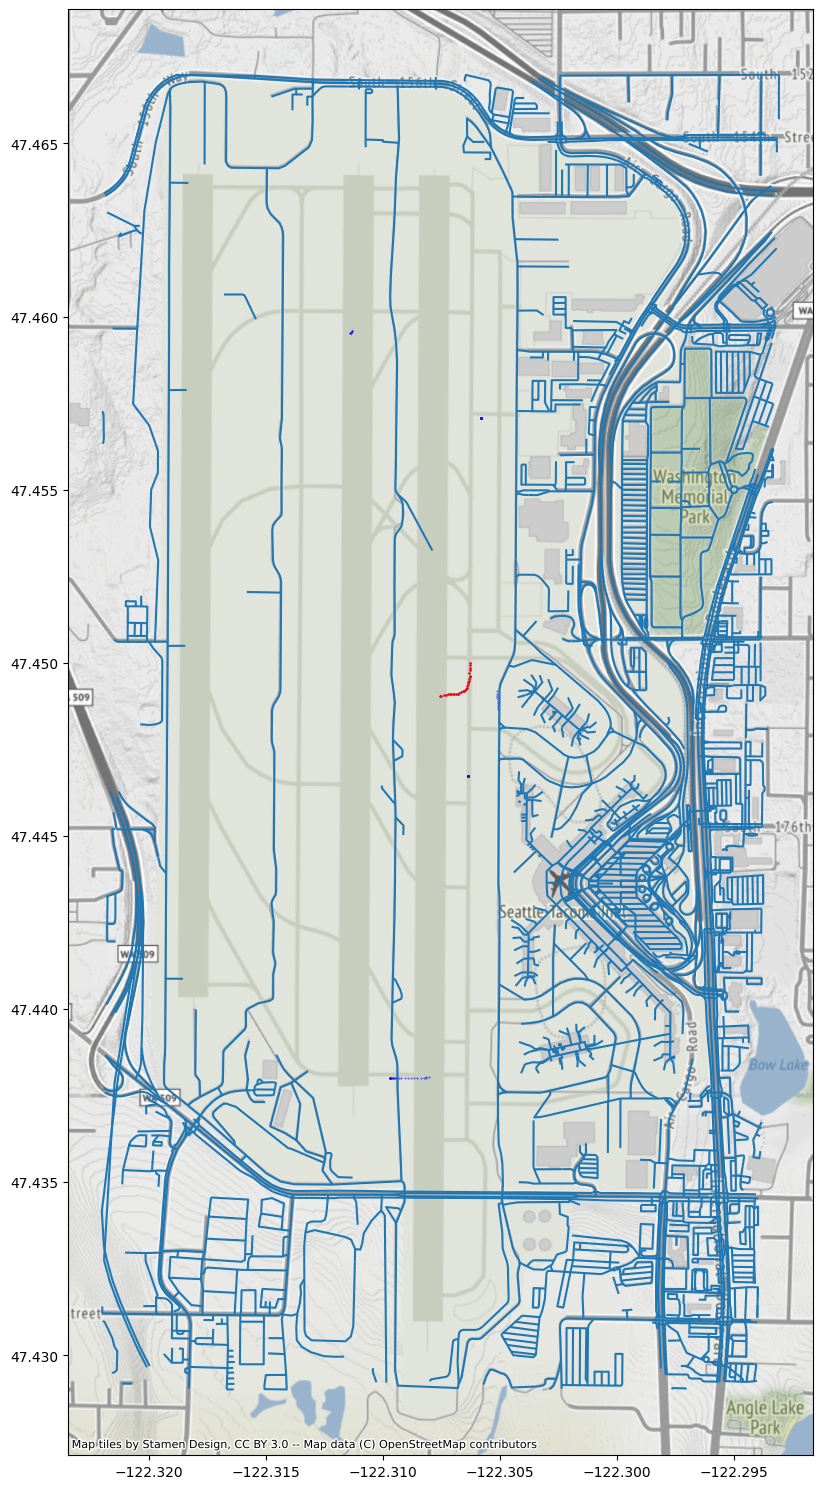

In [4]:
import warnings
warnings.filterwarnings("ignore")

in_file = os.path.join(BASE_DIR, 'maps', AIRPORT, 'roads.shp')
crs = {'init':'EPSG:4326'}

fig, ax = plt.subplots(figsize = (25,15))
gdf = gpd.read_file(in_file)
gd = gdf.to_crs(epsg=4326)
gd.plot(ax=ax)
plt.tight_layout()
ctx.add_basemap(ax, crs=gdf.crs)

filtered_data = data[data.Frame >= frame_start] 
filtered_data = filtered_data[data.Frame <= frame_end]

unique_IDs = filtered_data.ID.unique()
for i, unique_ID in enumerate(unique_IDs):
    
    traj = filtered_data[filtered_data.ID == unique_ID]
    geometry = [Point(xy) for xy in zip(traj.Lon, traj.Lat)]

    gdf = GeoDataFrame(traj, geometry=geometry, crs=crs, copy = False)
    gdf.plot(ax=ax, column="ID", markersize=0.1, vmin =0 , vmax = 4000, color='blue')

geometry = [Point(xy) for xy in zip(traj_track.Lon, traj_track.Lat)]
gdf = GeoDataFrame(traj_track, geometry=geometry, crs=crs, copy = False)
gdf.plot(ax=ax, column="ID", markersize=0.5, vmin =0 , vmax = 4000, color='red')
